In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
df = pd.read_json('../Data/combined_with_dummies.json')
df.head()

,DocumentDate,SalePrice,Area,SqFtLot,WfntFootage,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,cdtn_2.0,cdtn_3.0,...,wtrloc_4.0,wtrloc_5.0,wtrloc_6.0,wtrloc_7.0,wtrloc_8.0,wtrloc_9.0,wtrpoorq_1.0,wtrresacc_1.0,wtrresacc_2.0,wtrresacc_3.0
8576000260,1546300800000,583950,57,5944,0,3270,0,250,0,1,...,0,0,0,0,0,0,0,0,0,0
7691000060,1546300800000,539950,41,8389,0,3200,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53300380,1546300800000,642950,51,4000,0,2487,0,45,0,1,...,0,0,0,0,0,0,0,0,0,0
2525059126,1546300800000,541000,91,13503,0,1030,0,210,0,0,...,0,0,0,0,0,0,0,0,0,0
53300290,1546300800000,647950,51,5362,0,2487,0,45,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#pd.plotting.scatter_matrix(df, figsize =[12,12]); way to big baby

In [4]:
df.corr()

,DocumentDate,SalePrice,Area,SqFtLot,WfntFootage,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,cdtn_2.0,cdtn_3.0,...,wtrloc_4.0,wtrloc_5.0,wtrloc_6.0,wtrloc_7.0,wtrloc_8.0,wtrloc_9.0,wtrpoorq_1.0,wtrresacc_1.0,wtrresacc_2.0,wtrresacc_3.0
DocumentDate,1.000000,0.044813,-0.014539,0.010500,0.005998,0.002973,-0.004144,0.001581,0.010762,0.014299,...,0.000121,-0.003610,-0.000207,0.008194,-0.000857,-0.003721,0.005124,0.005569,-0.002088,-0.004457
SalePrice,0.044813,1.000000,-0.040850,0.015736,0.076848,0.433613,0.135837,0.233021,-0.024300,0.069641,...,0.001365,0.014955,0.307676,0.106660,0.015542,0.010445,0.001485,0.017192,0.034847,0.003806
Area,-0.014539,-0.040850,1.000000,0.048688,0.026620,0.105163,-0.015526,0.120239,-0.017563,0.010680,...,-0.007962,-0.012671,-0.018387,-0.001613,0.019630,0.045555,0.008409,0.025600,0.030173,0.010136
SqFtLot,0.010500,0.015736,0.048688,1.000000,0.786419,0.034830,0.029570,0.046943,0.008638,-0.017324,...,-0.000450,-0.001148,0.001797,0.000145,0.005812,0.141863,0.007512,-0.000361,0.009323,0.009860
WfntFootage,0.005998,0.076848,0.026620,0.786419,1.000000,0.029502,0.039544,0.034453,0.001001,-0.013737,...,0.007135,0.020731,0.112736,0.072021,0.120769,0.389070,0.085995,0.042915,0.117965,0.107156
SqFtTotLiving,0.002973,0.433613,0.105163,0.034830,0.029502,1.000000,0.214127,0.438153,-0.064036,0.150484,...,-0.002840,-0.004145,0.102113,0.049816,0.034416,0.009731,0.006395,-0.005266,0.020284,0.007292
SqFtDeck,-0.004144,0.135837,-0.015526,0.029570,0.039544,0.214127,1.000000,-0.037964,-0.025595,-0.083835,...,-0.001107,0.050491,0.067142,0.055043,0.065637,0.041546,0.016123,0.051681,0.071214,0.005005
SqFtOpenPorch,0.001581,0.233021,0.120239,0.046943,0.034453,0.438153,-0.037964,1.000000,-0.015032,0.121311,...,-0.003658,-0.001584,0.062897,0.020975,0.037316,0.039024,0.006002,-0.001407,0.004015,-0.004581
cdtn_2.0,0.010762,-0.024300,-0.017563,0.008638,0.001001,-0.064036,-0.025595,-0.015032,1.000000,-0.112483,...,-0.000512,-0.001354,0.001215,0.008311,0.006914,0.003510,0.014520,-0.002509,-0.003834,0.017598
cdtn_3.0,0.014299,0.069641,0.010680,-0.017324,-0.013737,0.150484,-0.083835,0.121311,-0.112483,1.000000,...,0.004550,0.007238,-0.001285,-0.007382,-0.020113,-0.012704,-0.006398,-0.003641,-0.013495,-0.006742


In [5]:
data_pred = df.iloc[:,2:50]
data_pred.head()

,Area,SqFtLot,WfntFootage,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,cdtn_2.0,cdtn_3.0,cdtn_4.0,cdtn_5.0,...,wtrloc_4.0,wtrloc_5.0,wtrloc_6.0,wtrloc_7.0,wtrloc_8.0,wtrloc_9.0,wtrpoorq_1.0,wtrresacc_1.0,wtrresacc_2.0,wtrresacc_3.0
8576000260,57,5944,0,3270,0,250,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7691000060,41,8389,0,3200,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53300380,51,4000,0,2487,0,45,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2525059126,91,13503,0,1030,0,210,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
53300290,51,5362,0,2487,0,45,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_corr=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)


df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))


df_corr.set_index(['pairs'], inplace = True)


df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

In [7]:
df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

,cc
pairs,
"(prptytyp_3, prptytyp_11)",0.879641
"(wtrloc_7.0, laksam_4.0)",0.857897
"(SqFtLot, WfntFootage)",0.786419
"(cdtn_3.0, cdtn_4.0)",0.758555
"(wtrloc_6.0, lakewas_4.0)",0.755890


In [8]:
#data_pred.drop(columns=['prptytyp_3','prptytyp_11', 'wtrloc_7.0', 'laksam_4.0', 'cdtn_3.0', 'cdtn_4.0', 'wtrloc_6.0', 'lakewas_4.0'], inplace = True)
#data_pred.shape

#data_pred.drop(columns ='WfntFootage', inplace = True) #choosing to keep SqFtLot isntead of WfntFootage 
                                                        #because all house types have lots as opposed to 
                                                        #having waterfronts


In [9]:
#data_pred



In [10]:
#data_pred.corr()

In [11]:
df.drop(columns = ['WfntFootage','prptytyp_3','prptytyp_11', 'wtrloc_7.0', 'laksam_4.0', 'cdtn_3.0', 'cdtn_4.0', 'wtrloc_6.0', 'lakewas_4.0'], inplace = True)

In [12]:
df

,DocumentDate,SalePrice,Area,SqFtLot,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,cdtn_2.0,cdtn_5.0,laksam_1.0,...,wtrloc_1.0,wtrloc_3.0,wtrloc_4.0,wtrloc_5.0,wtrloc_8.0,wtrloc_9.0,wtrpoorq_1.0,wtrresacc_1.0,wtrresacc_2.0,wtrresacc_3.0
8576000260,1546300800000,583950,57,5944,3270,0,250,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7691000060,1546300800000,539950,41,8389,3200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53300380,1546300800000,642950,51,4000,2487,0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2525059126,1546300800000,541000,91,13503,1030,0,210,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53300290,1546300800000,647950,51,5362,2487,0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426059089,1577750400000,1201000,36,65496,3680,1000,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7128300190,1577750400000,346629,15,3000,1280,0,190,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3331500845,1577750400000,225000,81,5150,570,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
945000570,1577750400000,1150000,6,4650,2820,220,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.drop(columns='DocumentDate', inplace= True)

In [14]:
from src.mymods import correlation_info

The top correlation features for you target it: ['SqFtTotLiving', 'tideshore_2.0', 'SqFtOpenPorch', 'wtrbank_1.0', 'SqFtDeck', 'lakewas_3.0']


(None, <matplotlib.axes._subplots.AxesSubplot at 0x25c4f6ed430>)

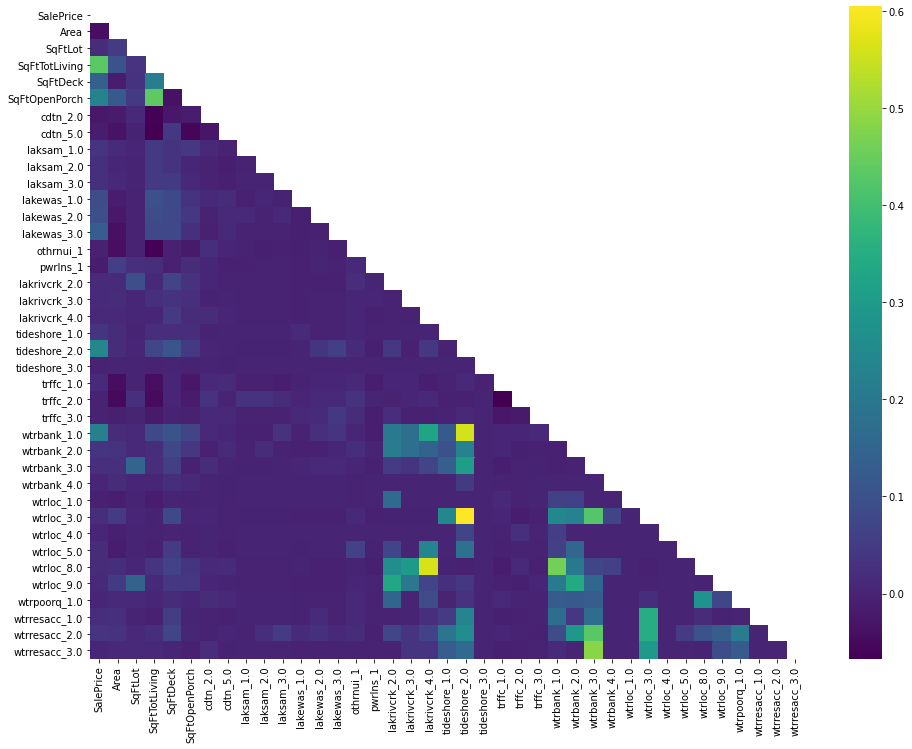

In [15]:
correlation_info(df,'SalePrice', .10)

In [16]:
from src.mymods import model_summary

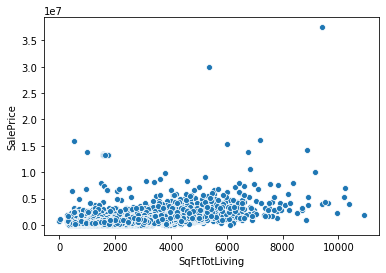

In [17]:
sns.scatterplot(y=df.SalePrice, x =df.SqFtTotLiving)

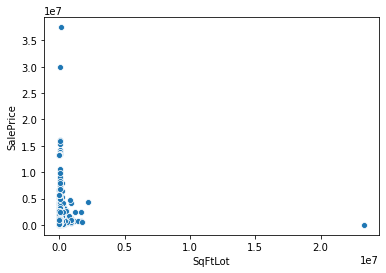

In [18]:
sns.scatterplot(y = df.SalePrice, x = df.SqFtLot)

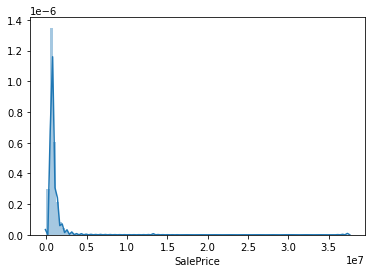

In [19]:
sns.distplot(df.SalePrice, bins=100)

In [20]:
porch_data= df[['SalePrice', 'SqFtOpenPorch']]
porch_data.head()

,SalePrice,SqFtOpenPorch
8576000260,583950,250
7691000060,539950,0
53300380,642950,45
2525059126,541000,210
53300290,647950,45


In [21]:
porch_sale_price= df[(df.SqFtOpenPorch > 0)]
no_porch_sale_price = df[(df.SqFtOpenPorch == 0)]
df_porch= ['porch_sale_price','no_porch_sale_price']

In [22]:
porch_sales = porch_sale_price['SalePrice']
no_porch_sales = no_porch_sale_price['SalePrice']
porch_mean= porch_sales.mean()
no_porch_sale_price_mean = no_porch_sales.mean()

print(porch_mean)
print(no_porch_sale_price_mean)

934102.383273767
684489.5146162746


In [23]:
from scipy import stats

In [24]:
stats.ttest_ind(porch_sales, no_porch_sales)

Ttest_indResult(statistic=24.959057738044642, pvalue=5.966075403670415e-136)

In [25]:
diff_mean = porch_mean - no_porch_sale_price_mean

In [26]:
diff_mean

249612.86865749233

In [28]:
fix, ax= plt.subplots()
plt.bar()

KeyError: "None of [Index(['porch_mean', 'no_porch_sale_price_mean'], dtype='object')] are in the [columns]"